# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# Business Understanding Phase CRISP-DM Methodology

## Determine Business Objectives
 1. Background - Used cars sales and inventory.
    A. The dataset provided contains less than half a millon observations with around 15 attributes that may influence the price of the car.
    B. Some attributes can be combined to lower the number of attributes and some are already combined viz VIN number.  
 3. Business Objectives
    A. Business objective is to understand what factors make a car more or less expensive.    
    B. Based on findings the final report is provided to a group of used car dealers interested in fine-tuning their inventory. 
 5. Business Success Criteria - Success if above two objectives are met.

## Assess Situation
 1. Inventory of Resources - Only one resource working on modeling that is me, machine, access, programs like jyupeter are all installed and ready.
 2. Requirements, Assumptions, and Constraints - Dataset Provided, Assumptions are made based on data quality, time constraint due to data quality.
 3. Risks and Contingencies - skew of results if the data filling is done for some attributes with appropriate techniques, and nulls are deleted.
 4. Terminology - CRISP-DM and Data Mining Terminology to be used.
 5. Costs and Benefits - Project cost and benefits realization would be done only in real world scenario. 

## Determine Data Mining Goals
 1. Data Mining Goals - Gather/clean/construct/integrate/format as much relevent data needed to develop best model possible. 
 2. Data Mining Success Criteria - Working model Validation, Evaluation, accessment and deployment.

## Produce Project Plan
 1. Project P - Data Understanding (Exlore), Data Preparation (clean, construct, format, integrate), Model (Technique, Design, Build, Assess), Evaluate (Model results vs Business Success Criteria), Deploy (Maintainance/Support)lan
 2. Initial Assessment of Tools and Techniq - Data Mining concepts/Principle Component Analysis/Clustering/K-fold validation/Attribute selection, encodeing/Models - Regression/Lasso, Gridsearch to select best model.ble data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error

In [114]:
vehicles = pd.read_csv('data/vehicles.csv')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
vehicles.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

<Axes: >

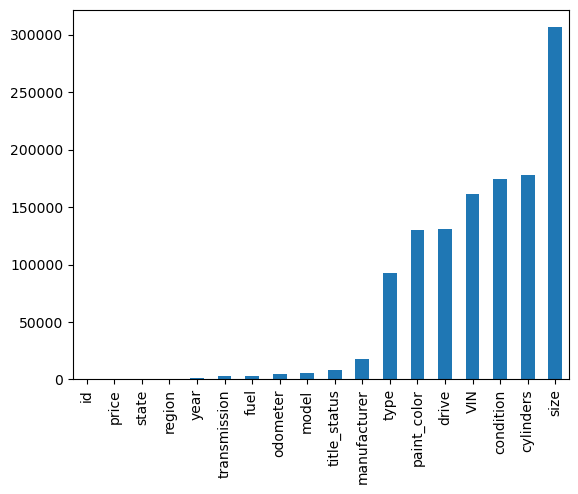

In [4]:
#vehicles.isnull().sum()
vehicles.isnull().sum().sort_values().plot(kind = 'bar')
#mileage, condition are the most important. After that, options, location, and color are influencing factors

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data Understanding Phase CRISP-DM Methodology

## Collect Initial Data

 1. Initial Data Collection Report

    - The dataset .csv file obtained from business contains the some of the important features that influence the price of the car.
    - Some may be highly influencial like age of the car and odometer reading and some are less influencial like color which is yet to be seen in while developing model.

## Describe Data

 1. Data Description Report

    - Features like price, state, region, year, transmission, fuel, odometer, model, title_status, manufacturer have most data with few NaN's.
    - Features like type, color, drive, condition, cylinders and size have more data missing.
    - Feature VIN also cotains the coded information of Manufacturer, Region, vehicle type, model, transmission, model year etc.

   #### VIN

    1. First digit: The country of origin
    2. Second digit: The manufacturer and region of production
    3. Third digit: The vehicle type or manufacturing division
    4. Fourth through eighth digits: The model, body type, transmission type, engine code, and restraint system
    5. Ninth digit: The check digit, which is used to detect fraudulent VINs
    6. Tenth digit: The model year
    7. Eleventh digit: The plant that assembled the car
    8. Last six digits: The production sequence number, which is unique to each car

## Explore Data

 1. Data Exploration Report

    - Region - 50 states plus washington DC was identified which is a district not a state. 
    - condition of vehicle vs title_status vs price plots reveiled the relationship between them.
    - linear model plot - plotted between price vs year and price vs odometer reveiled correlation between these features.
    - Price - Logethemic value shows there are vehicles with 0,1,5 etc values and years from age from 1900 to 2000 which are clunkers and relics.
    - Cylinder vs type vs size plots reveiled that 'type' can be used instead of cylinders and size columns as all types of vehicles use all different cylinders and sizes.

## Verify Data Quality

 1. Data Quality Report

    - Data has relics, clunkers and current version of models.
    - Data about price range 0-100 and also present indicating gifts and donations of cars. Price higher than 100k also suggests outliers in upper range.
    - lastly NaN's also present which are challenging to fill.
    - Though dataset have ample features to create model but its not complete from observations data perspective.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error

In [8]:
vehicles = pd.read_csv('data/vehicles.csv')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [10]:
vehicles.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

<Axes: >

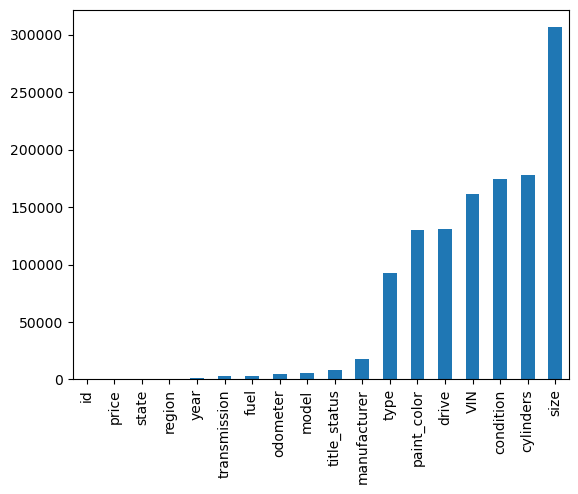

In [11]:
#vehicles.isnull().sum()
vehicles.isnull().sum().sort_values().plot(kind = 'bar')
#mileage, condition are the most important. After that, options, location, and color are influencing factors

<Axes: xlabel='title_status', ylabel='price'>

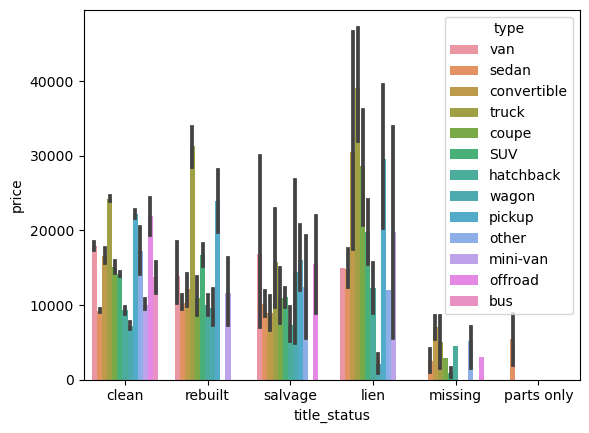

In [422]:
#vehicles['state'].value_counts().count()
#vehicles['id'].is_unique #can be used a index
#vehicles.query("state not in @list")['state'].value_counts().count()
#vehicles.query("state not in @list")
#vehicles.groupby('state')['price'].plot()
vehicles_clean = vehicles.dropna()
sns.barplot(x="title_status", y="price", hue = "type",data=vehicles_clean)

In [19]:
#Manufacturer list
vehicles['manufacturer'].value_counts()

#Region and state
vehicles['state'].value_counts()
#Region:
list = ['al','ak','az','ar','ca','co','ct','de','fl','ga','hi','id','il','in','ia','ks','ky','la','me','md','ma','mi','mn','ms','mo',
        'mt','ne','nv','nh','nj','nm','ny','nc','nd','oh','ok','or','pa','ri','sc','sd','tn','tx','ut','vt','va','wa','wv','wi','wy']
#vehicles['state'].value_counts().count()
#vehicles['id'].is_unique #can be used a index
#vehicles.query("state not in @list")['state'].value_counts().count()
#vehicles.query("state not in @list")
#vehicles.groupby('state')['price'].plot()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '6 cylinders'),
  Text(1, 0, '4 cylinders'),
  Text(2, 0, '8 cylinders'),
  Text(3, 0, '5 cylinders'),
  Text(4, 0, '10 cylinders'),
  Text(5, 0, '3 cylinders'),
  Text(6, 0, 'other'),
  Text(7, 0, '12 cylinders')])

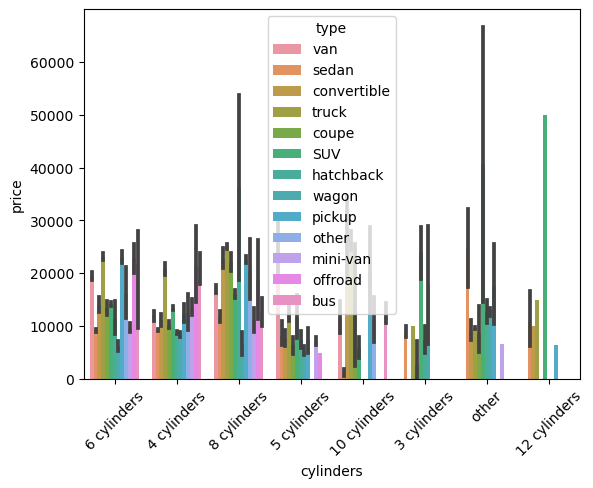

In [20]:
#Cylinder vs type vs size analysis
#sns.histplot(vehicles_replaced['price'], kde=True, color='skyblue')
#vehicles_clean.plot.bar(x='year', y='price')
sns.barplot(x="cylinders", y="price", hue = "type",data=vehicles_clean)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '6 cylinders'),
  Text(1, 0, '4 cylinders'),
  Text(2, 0, '8 cylinders'),
  Text(3, 0, '5 cylinders'),
  Text(4, 0, '10 cylinders'),
  Text(5, 0, '3 cylinders'),
  Text(6, 0, 'other'),
  Text(7, 0, '12 cylinders')])

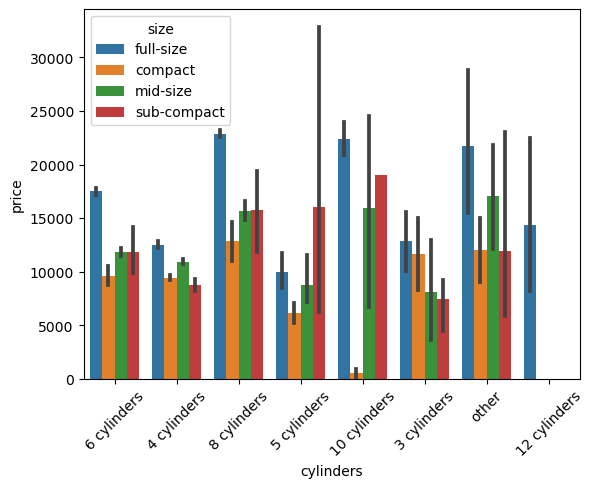

In [18]:
#Cylinder vs type vs size analysis
sns.barplot(x="cylinders", y="price", hue = "size",data=vehicles_clean)
plt.xticks(rotation=45)

In [ ]:
#Price behaviour
vehicles['price_log'] = np.log1p(vehicles['price'])
vehicles['price_log'].hist()
plt.show()

In [604]:
vehicles[(vehicles['price'] >= 1000000)]

id                      region       price    year  \
280     7315849335                  birmingham   987654321  1960.0   
1838    7315961634                      dothan    99999999  1993.0   
26075   7314964461             fresno / madera     1111111  2014.0   
29386   7305265540             humboldt county  1111111111  1999.0   
37409   7314053169                     modesto  1111111111  2020.0   
37410   7314052904                     modesto  3009548743  2021.0   
68935   7302895209              ventura county     2000000  2002.0   
83367   7305236744                  eastern CT     1000000  2022.0   
87052   7308297502                   new haven     1000000  2019.0   
91576   7309730903                    delaware  3024942282  2000.0   
91605   7309194824                    delaware     1000000  2022.0   
91807   7305237859                    delaware     1000000  2022.0   
105843  7314124996                     orlando     6995495  2014.0   
122470  7315836487                     atlanta   987654321  1960.0   
136516  7316047597     spokane / coeur d'alene    17000000  2007.0   
137807  7314339777     spokane / coeur d'alene   123456789  1999.0   
153082  7305153975                indianapolis  1234567890  2006.0   
155421  7308748768                 terre haute     1234567  2006.0   
184704  7304345156                   frederick  1410065407  1989.0   
193736  7315524207                   ann arbor   123456789  2015.0   
194292  7307876060                   ann arbor     1234567  2010.0   
207080  7316831610                    muskegon   123456789  2003.0   
213918  7316796970       minneapolis / st paul     1111111  1999.0   
219241  7305419038                southwest MS     1111111  1970.0   
230753  7308010868                   asheville   135008900  2008.0   
232829  7313752706                   charlotte     1000000  2016.0   
233201  7312388595                   charlotte     1000000  2016.0   
233823  7310495996                   charlotte     1000000  2016.0   
241404  7313748377       raleigh / durham / CH   113456789  1980.0   
257840  7309735768                south jersey  3024942282  2000.0   
283429  7315745313               new hampshire     1111111  1994.0   
283906  7314839271               new hampshire     5000000  2021.0   
286156  7316162605                north dakota     1666666  1902.0   
286323  7316737760              akron / canton    12345678  2019.0   
286324  7316737396              akron / canton    12345678  2019.0   
288356  7302369138              akron / canton   123456789  1965.0   
288400  7302113550              akron / canton    12345678  2019.0   
288401  7302112231              akron / canton    12345678  2019.0   
300308  7316820733                   mansfield    10004000  2002.0   
303014  7316736586                  youngstown    12345678  2019.0   
303644  7302117601                  youngstown    12345678  2019.0   
307488  7303218798                  stillwater   123456789  1996.0   
318592  7308056031                      eugene  3736928711  2007.0   
327938  7314563134           altoona-johnstown     3226714  2002.0   
353641  7315944204                     jackson    11111111  1966.0   
356716  7302445002                   knoxville  3736928711  1999.0   
356959  7315942075                     memphis     1111111  1966.0   
358555  7317052348                   nashville   123456789  2021.0   
362822  7304059291                     abilene     1234567  1955.0   
362837  7303378226                     abilene     1234567  1955.0   
362867  7301838920                     abilene     1234567  1955.0   
367296  7304059523             college station     1234567  1955.0   
367308  7303377558             college station     1234567  1955.0   
367357  7301841237             college station     1234567  1955.0   
377396  7304058775  killeen / temple / ft hood     1234567  1955.0   
377425  7303379556  killeen / temple / ft hood     1234567  1955.0   
377515  7301832876  killee

<Axes: xlabel='title_status', ylabel='price'>

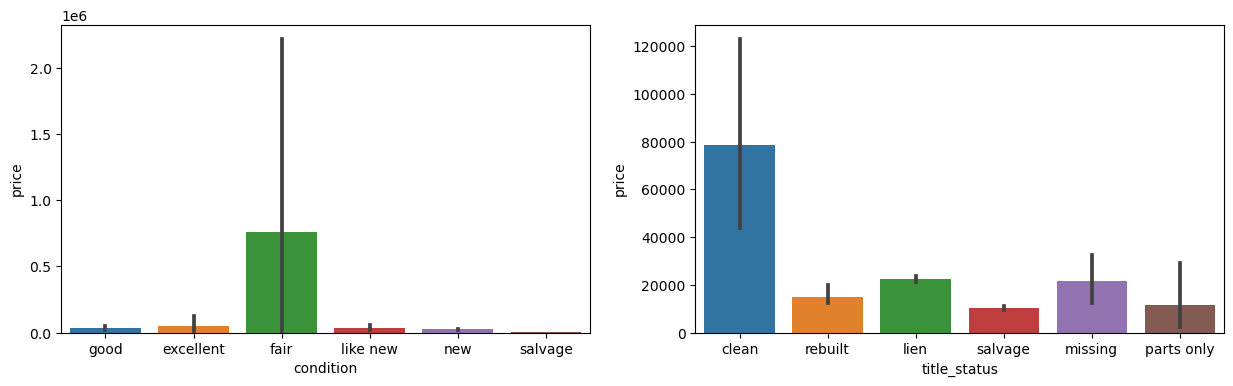

In [605]:
# condition vs title_status vs price
fig, (axis1, axis2)=plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x='condition', y='price', data=vehicles, ax=axis1)
sns.barplot(x='title_status', y='price', data=vehicles, ax=axis2)

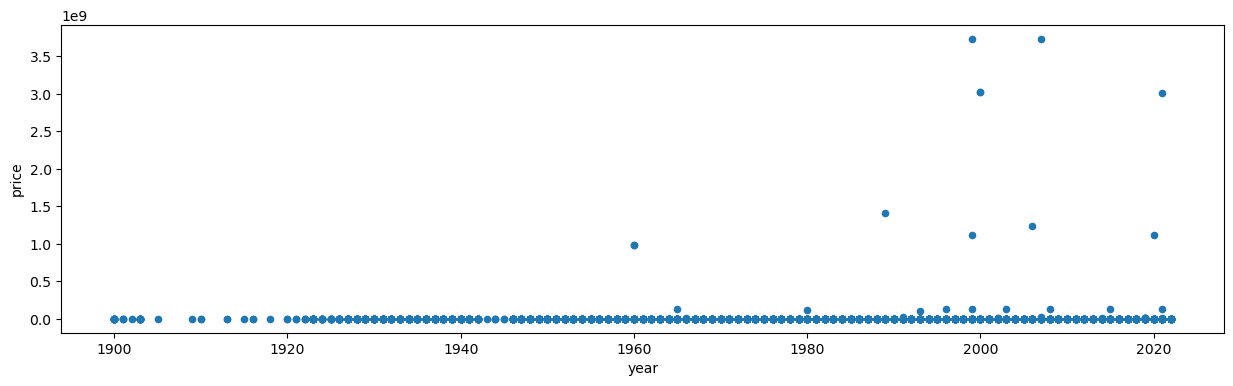

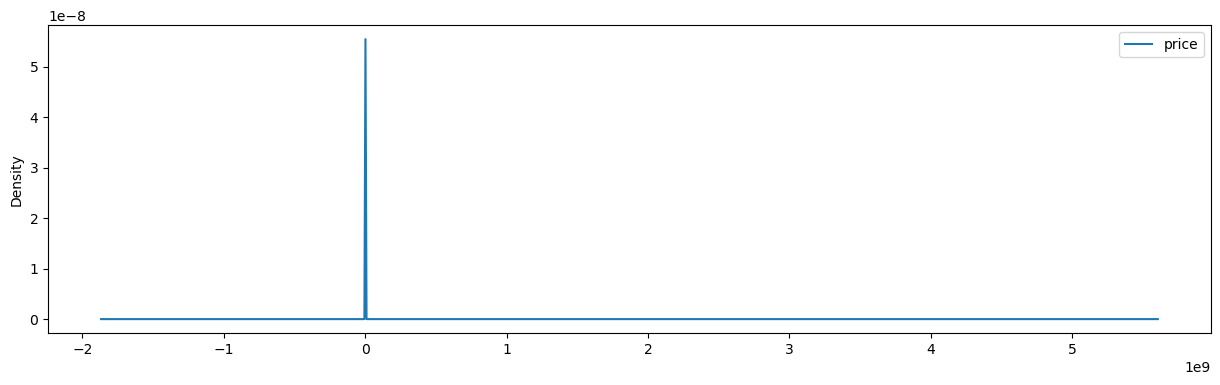

In [607]:
vehicles.plot(kind='scatter', x='year', y='price', figsize=(15, 4))
vehicles.plot(kind='kde', x='odometer', y='price', figsize=(15, 4))
plt.show()

In [425]:
#vehicles[vehicles['price'] == 1]['price'].value_counts()
#vehicles[vehicles['price'] == 5]['price']
#vehicles_value = vehicles[vehicles['price'] != 0]

vehicles_price = vehicles
vehicles_price = vehicles_price.query("price > 1000")
#vehicles_price.shape # (426880, 19)
#vehicles_price['price_log'].hist()
#plt.show()
vehicles_price['year'].value_counts() # Model Year suggests most of the cars are either clunkers or gifts as coindition of cars is surprisingly betterthan fair
vehicles_price['condition'].value_counts() # Most cars of priced less than $1000 are in better than fair condition
vehicles_price['title_status'].value_counts()#Most of the cars have clean title so assuming 90% of these cars are gifts.
#Conclusion: removing observations of cars priced below $1000
#vehicles_price['price_log'].hist()



title_status
clean         360059
rebuilt         7039
salvage         3607
lien            1402
missing          592
parts only       105
Name: count, dtype: int64

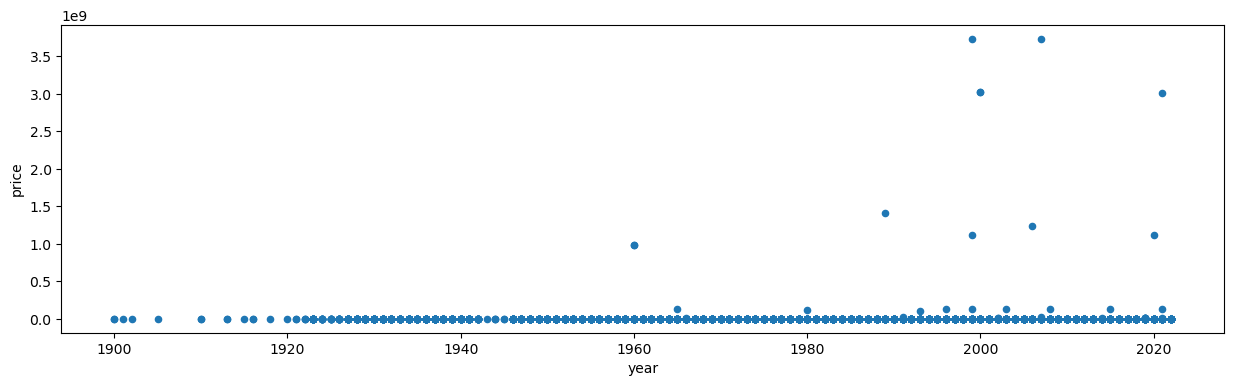

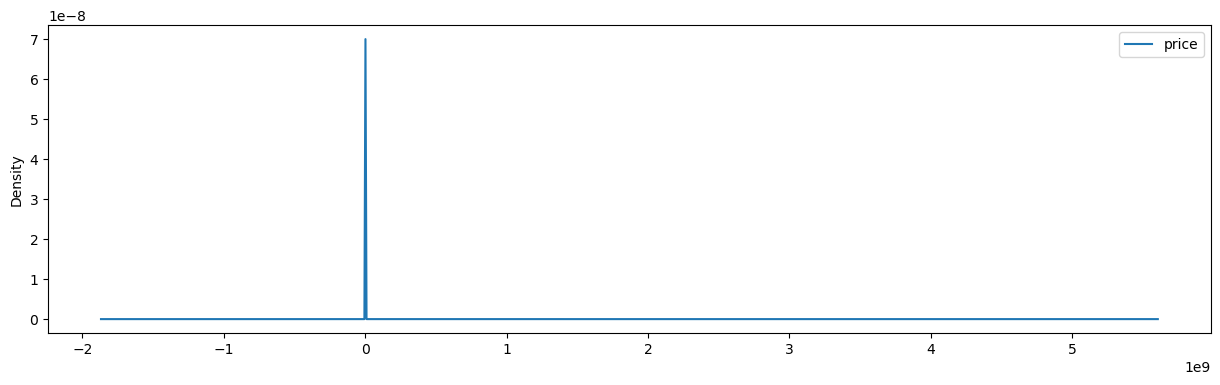

In [327]:
vehicles_price.plot(kind='scatter', x='year', y='price', figsize=(15, 4))
vehicles_price.plot(kind='kde', x='odometer', y='price', figsize=(15, 4))
plt.show()

In [ ]:
vehicles_price_odo_year = vehicles_price[['year','odometer','price']] # creating df with only year odometer and price columns
#vehicles_price_odo_year['odometer'] = vehicles_price_odo_year['odometer'].astype('str')
#vehicles_price_odo_year['year'] = vehicles_price_odo_year['year'].fillna(0).astype('int64')
#vehicles_price_odo_year =vehicles_price_odo_year[vehicles_price_odo_year['odometer']!='nan']
#vehicles_price_odo_year['year'] = vehicles_price_odo_year['year'].astype('str')
#vehicles_price_odo_year['new_year'] = vehicles_price_odo_year['year'].str.split('.').str[0]
#vehicles_price_odo_year['new_odometer'] = vehicles_price_odo_year['odometer'].str.split('.').str[0]
vehicles_price_odo_year

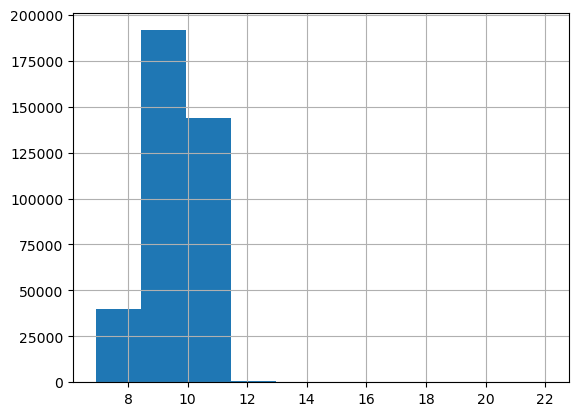

In [377]:
#logerthmic plot on price after removing nulls considering the price > 1000
#vehicles_price_odo_year['new_year'] = vehicles_price_odo_year['new_year'].astype('int64')
#vehicles_price_odo_year['new_odometer'] = vehicles_price_odo_year['new_odometer'].astype('int64')
#vehicles_price_odo_year = vehicles_price_odo_year.drop(columns = ['year','odometer'])
#vehicles_price_odo_year.plot()

np.log1p(vehicles_price_odo_year['price']).hist()
plt.show()

In [401]:
#Removing outdated clunkers and relics 
#Note: antique Relics are the ones which are priced higher due to uniqueness
vehicles_price_odo_year[(vehicles_price_odo_year['new_year'] >= 1900) & (vehicles_price_odo_year['new_year'] <= 2000)]
#vehicles_price_odo_year['new_year'].max()

price  new_year  new_odometer
37       4500      1992        192000
101     12990      1968         99999
137      2500      1966         47000
185      1800      1998        240537
193      5900      1998        214000
...       ...       ...           ...
426809  18000      1990        114400
426815   5000      1996        170000
426831   9800      1985        115000
426833   6800      1997         69550
426838  21900      1920         11065

[26701 rows x 3 columns]

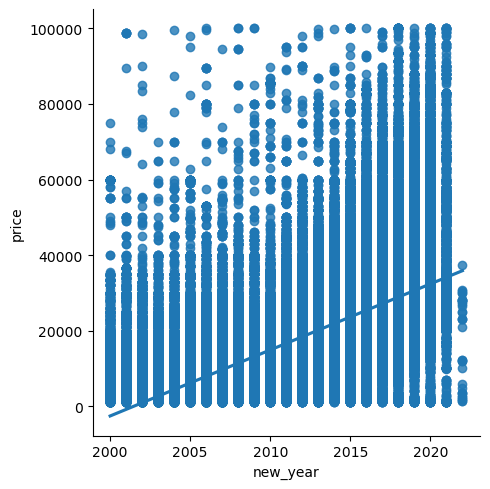

In [410]:
#linear model plot - plotted between price vs year and price vs odometer
vpoy_2000 = vehicles_price_odo_year[(vehicles_price_odo_year['new_year'] >= 2000) & (vehicles_price_odo_year['price'] <= 100000)]
#sns.barplot(x="new_odometer", y="price", data=vpoy_2000);
sns.lmplot(x="new_year", y="price", data=vpoy_2000);

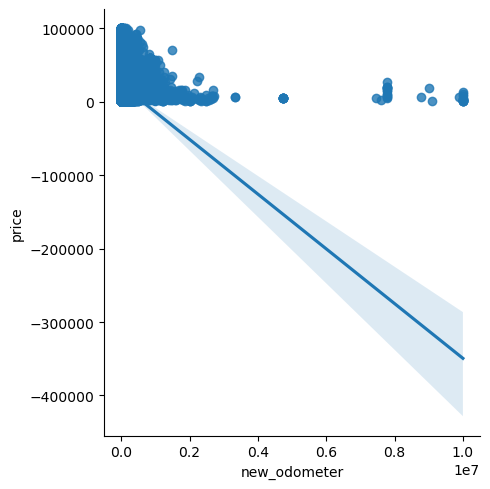

In [411]:
sns.lmplot(x="new_odometer", y="price", data=vpoy_2000);

### Plan of Action for Data Preparation: 

1. Clean up the nulls -
2. Keep tiel status = clean
3. Fill null for condition of vehicle : Price, Manufacturer, title status, odometer,year
4. remove observations with price = 0
5. remove observations relataed to new and salvage vehicles
6. Condition: only keep: good, excellent, fair : Make like new to excellent
7. select the observation with type null, get model and compare the model with another observation of same model when type is not null \
and update the null with that value.
8. select the observation with condtion is null and compare the year, model, of the vehicle with another vehicle with same year and model, title status. milege > minimum milege of the condition of the vehicle being compared and price with mean milege and price of same year model

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

# Data Preparation Phase CRISP-DM Methodology

## Data Set
 1. Data Set Description

   - Nulls: 
size, cylinders and condition have most nulls followed by VIN
   - dropna() didn't work as expected leaving 'nan' values even after applying function.
   - 
VIN is coded column had the codes were known or programmed most of the attributes viz.Manufacturer/model year/model/transmission/body type would be necessary in this dataset. A feedback to be given to business to provide VIN for all cars so that manual work of collection of data can be avoide
   - .
Histogram of dependent variable Price was not contineous due to clunkers and relics between 1900 and 2.0
on.
## Select Data
 1. Rationale for Inclusion / Exclu
    
    #### Included:
    - Attributes 'year','odometer','region','manufacturer','model','condition','fuel','title_status','transmission', 'type','state'
    #### Excluded:
    - Data of cars from 1900 to 2000 as they are mostly relics and clunkers worth below $1000.
    - Data of cars below $1000 and greaterthan $100000 as they tend to be gifts and would skew the results
   sion
## Clean Data
 1. Data Cleaning Re
    - Data cleaning was very challenging as dropna() didn't work as expected.
    - Used fillna() to fill the 'nan' values that weren't picked up the dropna() or query() and then selected the only the observations that were not filled into a new dataframe.
    port
## Construct Data
 1. Derived Attrib:
   - Onehotencoder is used for all the categorical values and it would have generated several hundred attributes especially for 'model' attribute.
   - VIN is a strong contender of derived attributes as it contains atleast 5 attributes hidden in it but unfortunately its a time consuming process and it may be out of scope of this assignment.ut4s
 2. Gener
    - ted Rec:No new records were generated.ords
## Integrate Data
 1. Merged 
    - For a brief moment thought spliting the data into to dataframes and then filling the missing data in different attributes based on the other observations and joining back but it was too time consuming a task go avoided it. Data
## Format Data
 1. Reformatted :
    - No reformatting was done.odel

In [165]:
vehicles_dp = vehicles
vehicles_dp.replace('nan',np.nan,inplace=True)
vehicles_dp_mf = vehicles_dp[vehicles_dp['manufacturer'].notna()]
vehicles_dp_mf_ts = vehicles_dp_mf[vehicles_dp_mf['title_status'].notna()]
vehicles_dp_mf_ts_m = vehicles_dp_mf_ts[vehicles_dp_mf_ts['model'].notna()]
vehicles_dp_mf_ts_m['title_status'].isnull().value_counts()

title_status
False    396308
Name: count, dtype: int64

In [166]:
vehicles_dp_mftsm = vehicles_dp[vehicles_dp['manufacturer'].notna() &vehicles_dp['title_status'].notna()&vehicles_dp_mf_ts['model'].notna()&\
                                vehicles_dp['odometer'].notna()&vehicles_dp['transmission'].notna()&vehicles_dp['fuel'].notna()]
vehicles_dp_mftsm

id   region  price    year manufacturer  \
27      7316814884   auburn  33590  2014.0          gmc   
28      7316814758   auburn  22590  2010.0    chevrolet   
29      7316814989   auburn  39590  2020.0    chevrolet   
30      7316743432   auburn  30990  2017.0       toyota   
31      7316356412   auburn  15000  2013.0         ford   
...            ...      ...    ...     ...          ...   
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model  condition    cylinders    fuel  odometer  \
27      sierra 1500 crew cab slt       good  8 cylinders     gas   57923.0   
28                silverado 1500       good  8 cylinders     gas   71229.0   
29           silverado 1500 crew       good  8 cylinders     gas   19160.0   
30          tundra double cab sr       good  8 cylinders     gas   41124.0   
31                     f-150 xlt  excellent  6 cylinders     gas  128000.0   
...                          ...        ...          ...     ...       ...   
426875         maxima s sedan 4d       good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d       good          NaN     gas   12029.0   
426877          xt4 sport suv 4d       good          NaN  diesel    4174.0   
426878           es 350 sedan 4d       good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe       good          NaN     gas   22716.0   

       title_status transmission                VIN drive       size  \
27            clean        other  3GTP1VEC4EG551563   NaN        NaN   
28            clean        other  1GCSCSE06AZ123805   NaN        NaN   
29            clean        other  3GCPWCED5LG130317   NaN        NaN   
30            clean        other  5TFRM5F17HX120972   NaN        NaN   
31            clean    automatic                NaN   rwd  full-size   
...             ...          ...                ...   ...        ...   
426875        clean        other  1N4AA6AV6KC367801   fwd        NaN   
426876        clean        other  7JR102FKXLG042696   fwd        NaN   
426877        clean        other  1GYFZFR46LF088296   NaN        NaN   
426878        clean        other  58ABK1GG4JU103853   fwd        NaN   
426879        clean        other  WBA4J1C58KBM14708   rwd        NaN   

             type paint_color state  
27         pickup       white    al  
28         pickup        blue    al  
29         pickup         red    al  
30         pickup         red    al  
31          truck       black    al  
...           ...         ...   ...  
426875      sedan         NaN    wy  
426876      sedan         red    wy  
426877  hatchback       white    wy  
426878      sedan      silver    wy  
426879      coupe         NaN    wy  

[389610 rows x 18 columns]

<Axes: >

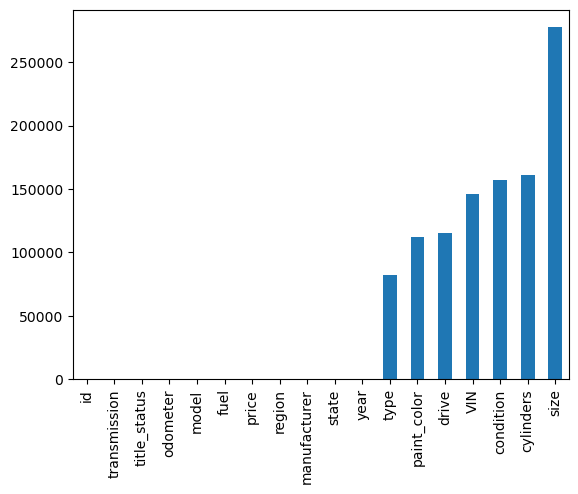

In [167]:
#vehicles_dp_y_t = vehicles_dp_y[vehicles_dp_y['transmission'].notna()]
#vehicles_dp_y_t
vehicles_dp_mftsm.isnull().sum().sort_values().plot(kind = 'bar')

<Axes: >

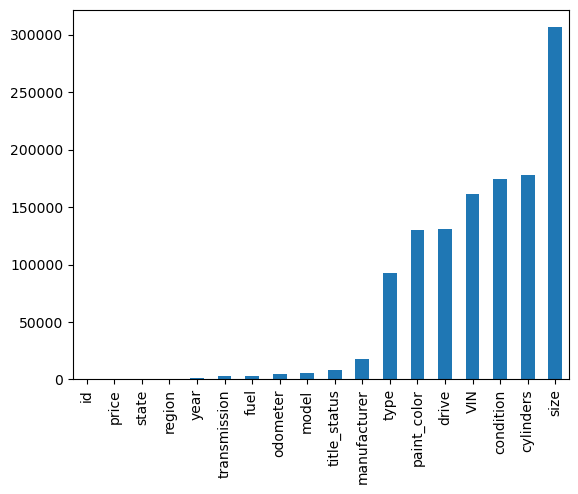

In [168]:
vehicles.isnull().sum().sort_values().plot(kind = 'bar')

<Axes: >

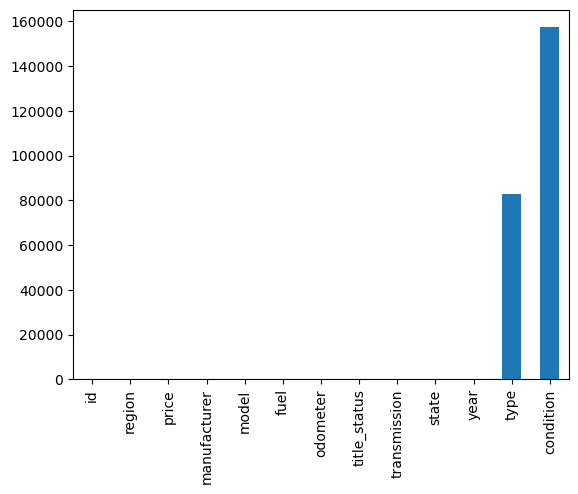

In [394]:
#vehicles_dp_mftsm = vehicles_dp_mftsm.fillna('flag') #fillna with 'falg' to ease the data handling
#state 51, region 404,fuel 5, model 21860, title_status 6, type 13, paint_color 12, 
#unique_list =len(np.unique(vehicles_dp_mftsm['paint_color']).tolist()) 
#unique_list
#vehicles_dp_mftsm[vehicles_dp_mftsm['paint_color'] != np.nan]
#vehicles_dp_mftsm_nonulls = vehicles_dp_mftsm[vehicles_dp_mftsm['paint_color'].isnull() == 'True']
#vehicles_dp_mftsm['paint_color'] = vehicles_dp_mftsm['paint_color'].fillna('glue')

vehicles_clean = vehicles_dp_mftsm.drop(columns = ['VIN','size','cylinders','drive','paint_color'])
#vehicles_clean['transmission'].value_counts()
vehicles_clean.isnull().sum().sort_values().plot(kind = 'bar')

In [ ]:
###########################check if column id is unique - Yes it is###########################3
is_unique_col1 = vehicles_clean['id'].is_unique
print(f"Is 'col1' unique? {is_unique_col1}")

In [ ]:
#############################check for duplicates##########################
vehicles_clean.duplicated().sum()

In [ ]:
############################checking all columns id, region, price, manufacturer, model, fuel, odometer, transmission, state, year has any nulls
has_nan = vehicles['odometer'].sum()
print(f"Column 'odometer' has NaN: {has_nan}")

In [ ]:
#########################found year has 'nan' value which is not 'np.nan' or 'NaN' to had to fill it with '0' and then removed based on folloing
vehicles_clean['year'] = vehicles_clean['year'].fillna(0)
year_unique = [vehicles_clean['year'].unique()]
year_unique
vehicles_clean.isnull().sum().sort_values().plot(kind = 'bar')

In [ ]:
########################################need to delete the vehicles from 1900 to 2000 and selecting price below 100000#######################
#Removing outdated clunkers and relics 
#Note: antique Relics are the ones which are priced higher due to uniqueness
#vehicles_clean.shape #389610 records after removing all nulls
#vehicles_clean = vehicles_clean[(vehicles_clean['year'] >= 1900) & (vehicles_clean['year'] <= 2000)]#23327 observations check ohly
vehicles_clean = vehicles_clean[(vehicles_clean['year'] >= 2000) & (vehicles_clean['price'] <= 100000)] #working code
vehicles_clean.shape #389610 with all vehicles from 1900 to 2000 and all prices#369159 observations after removing #working code

In [ ]:
##################"condition" attribute - the number of observations would reduce from 369k to 217k as 151k observations are missing##############
##############Applying law of large numbers observations >30 are enough so no filling the missing observations######################
vehicles_clean['condition'] = vehicles_clean['condition'].fillna('condition')
vehicles_clean = vehicles_clean[vehicles_clean['condition'] != 'condition'] #217k observations obtained as 151k in coindition column are missing


In [ ]:
##################"type" attribute - the number of observations would reduce from 217k to 191k as 25k observations are missing##############
##############Applying law of large numbers observations > 30 are enough so no filling the missing observations######################
###Type is a combination of cyliinders and size fo the vehicle so it can be kept but it has nulls so has to be filled with appropriate data
vehicles_clean['type'] = vehicles_clean['type'].fillna('type')
vehicles_clean_bkp = vehicles_clean # taken backup of vehicles_clean just in case
vehicles_clean = vehicles_clean[vehicles_clean['type'] != 'type']

In [402]:
########################################Selection of appropriate attributes based on the data available#######################
#title_status, fuel, odometer, year, type and condition are finalized as onehotencoding of these attributes is simpler and efficient
#state/region/manufacturer/model - onehotendcoding would create large number of columns and more pc power and jyupeter performance 
#state/region/manufacturer/model - so they were left out for validatiaon
#state/region/manufacturer/model - However are included in final modeling after model passed validation
#while lable/ordinal encoding needs an order which business can provide 

vehicles_clean = vehicles_clean.drop(columns = ['region','state','manufacturer','model'])
vehicles_clean_model = vehicles_clean ### Ready for mddeling
vehicles_clean_model

id   region  price    year manufacturer  \
27      7316814884   auburn  33590  2014.0          gmc   
28      7316814758   auburn  22590  2010.0    chevrolet   
29      7316814989   auburn  39590  2020.0    chevrolet   
30      7316743432   auburn  30990  2017.0       toyota   
31      7316356412   auburn  15000  2013.0         ford   
...            ...      ...    ...     ...          ...   
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model  condition    fuel  odometer title_status  \
27      sierra 1500 crew cab slt       good     gas   57923.0        clean   
28                silverado 1500       good     gas   71229.0        clean   
29           silverado 1500 crew       good     gas   19160.0        clean   
30          tundra double cab sr       good     gas   41124.0        clean   
31                     f-150 xlt  excellent     gas  128000.0        clean   
...                          ...        ...     ...       ...          ...   
426875         maxima s sedan 4d       good     gas   32226.0        clean   
426876  s60 t5 momentum sedan 4d       good     gas   12029.0        clean   
426877          xt4 sport suv 4d       good  diesel    4174.0        clean   
426878           es 350 sedan 4d       good     gas   30112.0        clean   
426879  4 series 430i gran coupe       good     gas   22716.0        clean   

       transmission       type state  
27            other     pickup    al  
28            other     pickup    al  
29            other     pickup    al  
30            other     pickup    al  
31        automatic      truck    al  
...             ...        ...   ...  
426875        other      sedan    wy  
426876        other      sedan    wy  
426877        other  hatchback    wy  
426878        other      sedan    wy  
426879        other      coupe    wy  

[217435 rows x 13 columns]

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# Modeling Phase CRISP-DM Methodology

## Select Modeling Technique
 1. Modeling Technique
    - Depending on the nature of the data and understanding 'supervised learning - Ridge regression and Lasso Regression models were used'.
      
 2. Modeling Assumptions
    
    - Ridge would perform better than Lasso as onehotencoder would generate several hundrends attributes as 'model' and 'region' have large number of values.
## Generate Test Design
 1. Test Design
    - Train and Test split was 70% and 30% respectively.
    - Kfolds only 2; keeping in mind the leaveoneout would take forever with about 200k observations.
## Build Model
 1. Parameter Settings: Alphas ranged [0.1,1,10,100,1000]; CrossValidation for GridSearchCV was set to 5. permutation_importance - repeats set to 10.
 2. Models:
    - Ridge and Lasso were used to compare 
 4. Model Description
    - Numeric and categorical transformers were used.
    - Preprocessor created
    - Pipelined
    - Gridsearched and fitted
    - Permutation Importance plotted.
## Assess Model
 1. Model Assessment
    - Ridge model alpha was 10 while validation (manufacturer, model, region and state were excluded).
    - Lasso mdoel alpha was toggled between .1 and 1 with Train and Test data respectively.
    - Ridge model alpha was 1 when test was performed with manufacturer, model, region and state included. So Ridge mode is selected.
      Note: Lasso is not expected to perfmrom good with large number of attributes.
 2. Revised Parameter Settings
    - Ridge Model: Alpha = 1, CV = 5 to start with while adding more atributes like 'cylinders' and 'size'.
    - Alpha is deminishing which is a good sign as more observations and attributes are added model would be more efficient.

In [426]:
vehicles_model = vehicles_clean_model
vehicles_model

id   region  price    year manufacturer  \
27      7316814884   auburn  33590  2014.0          gmc   
28      7316814758   auburn  22590  2010.0    chevrolet   
29      7316814989   auburn  39590  2020.0    chevrolet   
30      7316743432   auburn  30990  2017.0       toyota   
31      7316356412   auburn  15000  2013.0         ford   
...            ...      ...    ...     ...          ...   
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model  condition    fuel  odometer title_status  \
27      sierra 1500 crew cab slt       good     gas   57923.0        clean   
28                silverado 1500       good     gas   71229.0        clean   
29           silverado 1500 crew       good     gas   19160.0        clean   
30          tundra double cab sr       good     gas   41124.0        clean   
31                     f-150 xlt  excellent     gas  128000.0        clean   
...                          ...        ...     ...       ...          ...   
426875         maxima s sedan 4d       good     gas   32226.0        clean   
426876  s60 t5 momentum sedan 4d       good     gas   12029.0        clean   
426877          xt4 sport suv 4d       good  diesel    4174.0        clean   
426878           es 350 sedan 4d       good     gas   30112.0        clean   
426879  4 series 430i gran coupe       good     gas   22716.0        clean   

       transmission       type state  
27            other     pickup    al  
28            other     pickup    al  
29            other     pickup    al  
30            other     pickup    al  
31        automatic      truck    al  
...             ...        ...   ...  
426875        other      sedan    wy  
426876        other      sedan    wy  
426877        other  hatchback    wy  
426878        other      sedan    wy  
426879        other      coupe    wy  

[389610 rows x 13 columns]

In [377]:
vehicles_model =vehicles_model.drop(columns = ['id'],axis = 1)
vehicles_model

price    year  condition    fuel  odometer title_status transmission  \
27      33590  2014.0       good     gas   57923.0        clean        other   
28      22590  2010.0       good     gas   71229.0        clean        other   
29      39590  2020.0       good     gas   19160.0        clean        other   
30      30990  2017.0       good     gas   41124.0        clean        other   
31      15000  2013.0  excellent     gas  128000.0        clean    automatic   
...       ...     ...        ...     ...       ...          ...          ...   
426875  23590  2019.0       good     gas   32226.0        clean        other   
426876  30590  2020.0       good     gas   12029.0        clean        other   
426877  34990  2020.0       good  diesel    4174.0        clean        other   
426878  28990  2018.0       good     gas   30112.0        clean        other   
426879  30590  2019.0       good     gas   22716.0        clean        other   

             type  
27         pickup  
28         pickup  
29         pickup  
30         pickup  
31          truck  
...           ...  
426875      sedan  
426876      sedan  
426877  hatchback  
426878      sedan  
426879      coupe  

[191562 rows x 8 columns]

<font size="6">***###Ridge Model creation and validation with Train Data###***</font>

 mse: 80527663.2653315
 Best alpha: {'regressor__alpha': 10}
 Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type'])])),
                ('regressor', Ridge(alpha=10))])


<Axes: xlabel='Features'>

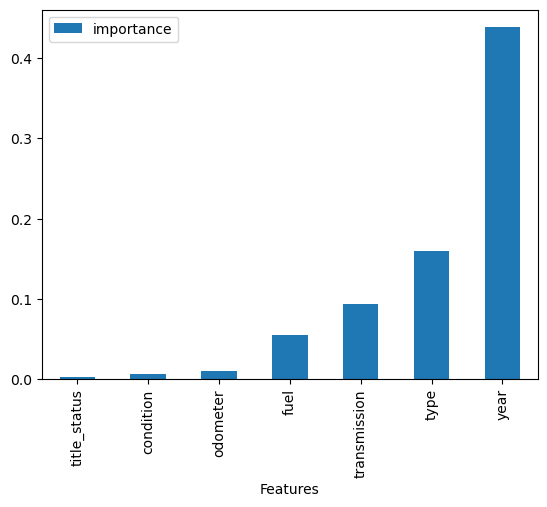

In [390]:
from sklearn.model_selection import train_test_split

X = vehicles_model.drop(columns = 'price', axis = 1)
y = vehicles_model['price']

X_train, X_test, y1_train, y1_test = '', '', '', ''
### BEGIN SOLUTION
X_train, X_test, y1_train, y1_test = train_test_split(X,y, random_state = 32, test_size=.3)

numeric_neatures = ['year','odometer']
categorical_features = ['condition','fuel','title_status','transmission','type']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore')

perprocessor = make_column_transformer((numeric_transformer,numeric_neatures),(categorical_transformer,categorical_features))
ridge_model = Pipeline(steps = [('preprocessor',perprocessor),('regressor',Ridge())])


param_grid = {'regressor__alpha': [0.1,1,10,100,1000]}

grid_search = GridSearchCV(ridge_model, param_grid,cv=5)
grid_search.fit(X_train,y1_train)
y_train_preds = grid_search.predict(X_train)
ridge_model_mse = mean_squared_error(y1_train,y_train_preds)
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_
print(f' mse: {ridge_model_mse}')
print(f' Best alpha: {best_alpha}')
print(f' Best Model: {best_ridge_model}')

perm_imp = permutation_importance(grid_search,X_train,y1_train,n_repeats=10,random_state= 42)
perm_imp_df = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df = perm_imp_df.reset_index()
perm_imp_df.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df.plot.bar(x='Features', y='importance')


<font size="6">***###Ridge Model validation with Test Data###***</font>

 mse: 79613530.38672556
 Best alpha: {'regressor__alpha': 10}
 Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type'])])),
                ('regressor', Ridge(alpha=10))])


<Axes: xlabel='Features'>

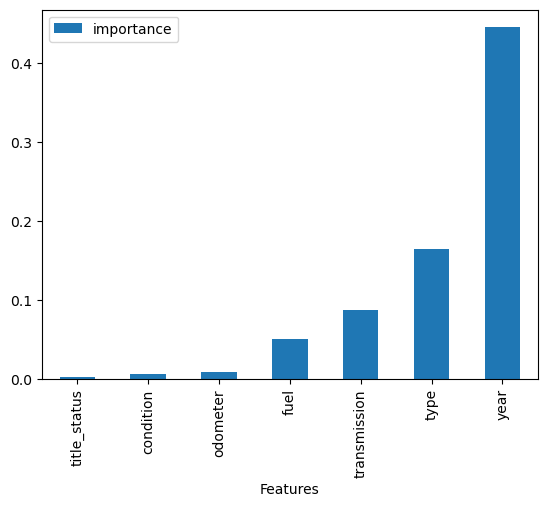

In [399]:
grid_search.fit(X_test,y1_test)
y_train_preds = grid_search.predict(X_test)
ridge_model_mse = mean_squared_error(y1_test,y_train_preds)
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_
print(f' mse: {ridge_model_mse}')
print(f' Best alpha: {best_alpha}')
print(f' Best Model: {best_ridge_model}')

perm_imp = permutation_importance(grid_search,X_test,y1_test,n_repeats=10,random_state= 42)
perm_imp_df = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df = perm_imp_df.reset_index()
perm_imp_df.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df.plot.bar(x='Features', y='importance')

<font size="6">***###Lasso Model creation and validation with Train Data###***</font>

 Losso mse: 80526969.95847633
 Best alpha losso: {'regressor__alpha': 0.1}
 Best Losso Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type'])])),
                ('regressor', Lasso(alpha=0.1))])


<Axes: xlabel='Features'>

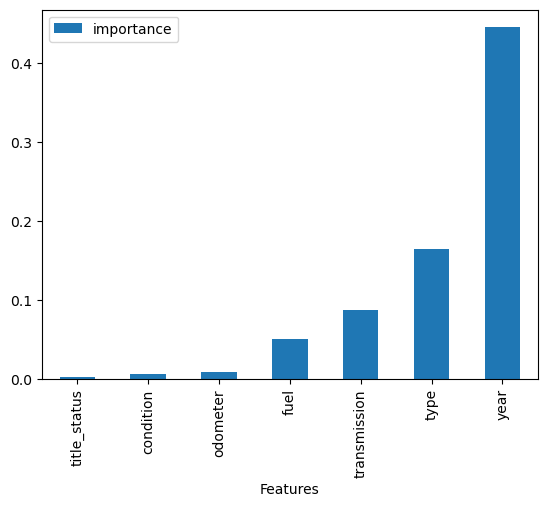

In [400]:
#selector = SelectFromModel(Lasso())
lasso_model = Pipeline(steps = [('preprocessor',perprocessor),('regressor',Lasso())])
grid_search_lasso = GridSearchCV(lasso_model, param_grid,cv=5)
grid_search_lasso.fit(X_train,y1_train)
y_preds_losso = grid_search_lasso.predict(X_train)
losso_model_mse = mean_squared_error(y1_train,y_preds_losso)
best_losso_model = grid_search_lasso.best_estimator_
best_alpha_losso = grid_search_lasso.best_params_
print(f' Losso mse: {losso_model_mse}')
print(f' Best alpha losso: {best_alpha_losso}')
print(f' Best Losso Model: {best_losso_model}')

perm_imp_lasso = permutation_importance(grid_search,X_train,y1_train,n_repeats=10,random_state= 42)
perm_imp_df_lasso = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df_lasso = perm_imp_df.reset_index()
#perm_imp_df_lasso
#perm_imp_df_lasso.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df_lasso.plot.bar(x='Features', y='importance')

<font size="6">***###Lasso Model validation with Test Data###***</font>

 Losso mse: 79617544.12470631
 Best alpha losso: {'regressor__alpha': 1}
 Best Losso Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type'])])),
                ('regressor', Lasso(alpha=1))])


<Axes: xlabel='Features'>

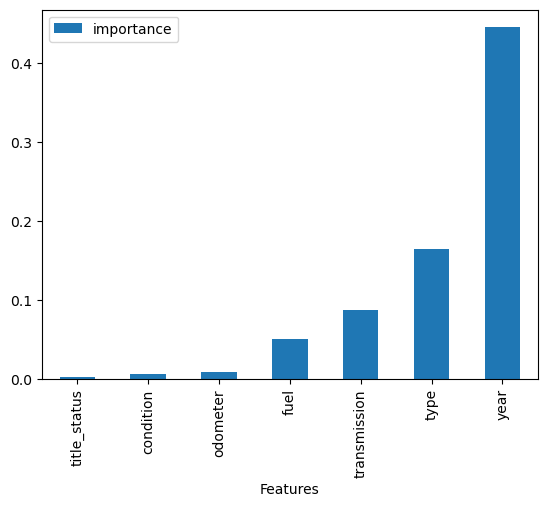

In [401]:
grid_search_lasso.fit(X_test,y1_test)
y_preds_losso = grid_search_lasso.predict(X_test)
losso_model_mse = mean_squared_error(y1_test,y_preds_losso)
best_losso_model = grid_search_lasso.best_estimator_
best_alpha_losso = grid_search_lasso.best_params_
print(f' Losso mse: {losso_model_mse}')
print(f' Best alpha losso: {best_alpha_losso}')
print(f' Best Losso Model: {best_losso_model}')

perm_imp_lasso = permutation_importance(grid_search,X_test,y1_test,n_repeats=10,random_state= 42)
perm_imp_df_lasso = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df_lasso = perm_imp_df.reset_index()
#perm_imp_df_lasso
#perm_imp_df_lasso.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df_lasso.plot.bar(x='Features', y='importance')

In [404]:
vehicles_model_plus = vehicles_clean_bkp

In [407]:
#vehicles_model_plus =vehicles_model_plus.drop(columns = ['id'],axis = 1)
vehicles_model_plus.head()

region  price    year manufacturer                     model  condition  \
27  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28  auburn  22590  2010.0    chevrolet            silverado 1500       good   
29  auburn  39590  2020.0    chevrolet       silverado 1500 crew       good   
30  auburn  30990  2017.0       toyota      tundra double cab sr       good   
31  auburn  15000  2013.0         ford                 f-150 xlt  excellent   

   fuel  odometer title_status transmission    type state  
27  gas   57923.0        clean        other  pickup    al  
28  gas   71229.0        clean        other  pickup    al  
29  gas   19160.0        clean        other  pickup    al  
30  gas   41124.0        clean        other  pickup    al  
31  gas  128000.0        clean    automatic   truck    al

<font size="6">***###Ridge Model creation with complex attributes (model/manufacturer/region/state)validation with Train Data###***</font>

 mse: 37179332.11394997
 Best alpha: {'regressor__alpha': 1}
 Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regressor', Ridge(alpha=1))])


<Axes: xlabel='Features'>

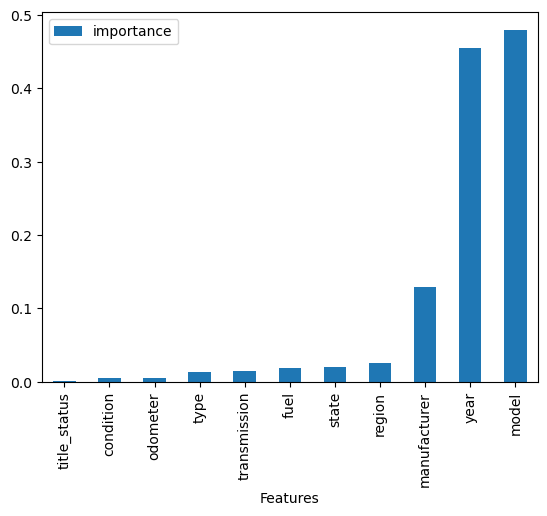

In [417]:
from sklearn.model_selection import train_test_split

X = vehicles_model_plus.drop(columns = 'price', axis = 1)
y = vehicles_model_plus['price']

X_train_plus, X_test_plux, y1_train_plus, y1_test_plus = '', '', '', ''
### BEGIN SOLUTION
X_train_plus, X_test_plux, y1_train_plus, y1_test_plus = train_test_split(X,y, random_state = 32, test_size=.3)

numeric_neatures = ['year','odometer']
categorical_features = ['region','manufacturer','model','condition','fuel','title_status','transmission', 'type','state']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore')

perprocessor = make_column_transformer((numeric_transformer,numeric_neatures),(categorical_transformer,categorical_features))
ridge_model = Pipeline(steps = [('preprocessor',perprocessor),('regressor',Ridge())])

param_grid = {'regressor__alpha': [0.1,1,10,100,1000]}

grid_search = GridSearchCV(ridge_model, param_grid,cv=5)
grid_search.fit(X_train_plus,y1_train_plus)
y_train_preds = grid_search.predict(X_train_plus)
ridge_model_mse = mean_squared_error(y1_train_plus,y_train_preds)
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_
print(f' mse: {ridge_model_mse}')
print(f' Best alpha: {best_alpha}')
print(f' Best Model: {best_ridge_model}')

perm_imp = permutation_importance(grid_search,X_train_plus,y1_train_plus,n_repeats=10,random_state= 42)
perm_imp_df = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df = perm_imp_df.reset_index()
perm_imp_df.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df.plot.bar(x='Features', y='importance')

<font size="6">***###Ridge Model with complex attributes (model/manufacturer/region/state)validation with Test Data###***</font>

 mse: 37068330.4297443
 Best alpha: {'regressor__alpha': 1}
 Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regressor', Ridge(alpha=1))])


<Axes: xlabel='Features'>

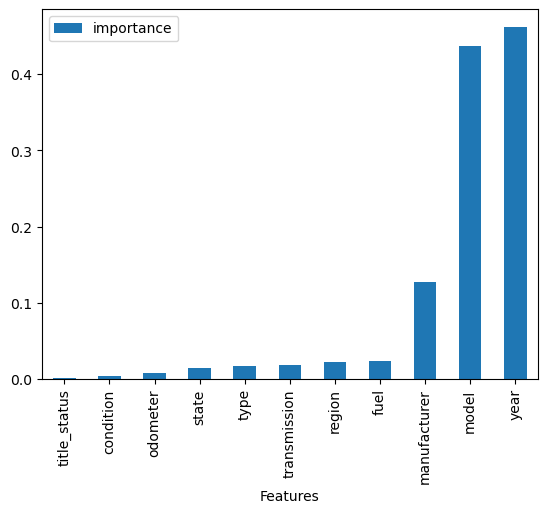

In [418]:
grid_search.fit(X_test_plux,y1_test_plus)
y_train_preds = grid_search.predict(X_test_plux)
ridge_model_mse = mean_squared_error(y1_test_plus,y_train_preds)
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_
print(f' mse: {ridge_model_mse}')
print(f' Best alpha: {best_alpha}')
print(f' Best Model: {best_ridge_model}')

perm_imp = permutation_importance(grid_search,X_test_plux,y1_test_plus,n_repeats=10,random_state= 42)
perm_imp_df = pd.DataFrame(perm_imp.importances_mean,index=X.columns, columns=['importance']).sort_values(by='importance')
perm_imp_df = perm_imp_df.reset_index()
perm_imp_df.rename(columns={'index': 'Features'}, inplace=True)
perm_imp_df.plot.bar(x='Features', y='importance')

# Validation: 

why kfolds was not considered due to pc performance considerations. Basically train and split is a two fold validation.
#Leaveoneout performance was even worse with just few hundred observations so these two approaches were not considered. 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Evaluation Phase CRISP-DM Methodology

## Evaluate Results
 1. Assessment of Data Mining Results w.r.t. Business Success Criteria
    - Results show Model and Year are the two most important factors (and Manufacturer follows after) what factors makes a car more or less expensive, which is achieved and the business goal is met.
    - Rrecommendations to your clien ( a used car deaership): Age, models and manufacturers of vehicles have huge impact on price. .
 3. Approved Model
    - This model can be approved as it has met the business criteria.s
## Review Process
 1. Review of Proces
    - if business doesn't need more attributes to be added to the model for assessment though they may have less impact and more observations updated appropriate values for run another round of validation and evaluation then the is a pass.s
## Determine Next Steps
 1. List of Possible Action
    - In real world Budgetory and Time consitrainsts are to be considered for further refinement of the model.
 2.  Decisio
    -Since this model is meeting the business objectives this can be deployed. Note: only 3 attributes (paint/cyclinders/size) were left out which will have minimal impact.n

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# Deployment Phase CRISP-DM Methodology

## Plan Deployment
 1. Deployment Plan
## Plan Monitoring and Maintenance
 1. Monitoring and
 2. Maintenance Plan
## Produce Final Report start
 1. Final Report
### Determine Business Objectives
 1. Background - Used cars sales and inventory.
    A. The dataset provided contains less than half a millon observations with around 15 attributes that may influence the price of the car.
    B. Some attributes can be combined to lower the number of attributes and some are already combined viz VIN number.  
 2. Business Objectives
    A. Business objective is to understand what factors make a car more or less expensive.    
    B. Based on findings the final report is provided to a group of used car dealers interested in fine-tuning their inventory. 
 3. Business Success Criteria - Success if above two objectives are met.

### Produce Project Plan
 1. Project P - Data Understanding (Exlore), Data Preparation (clean, construct, format, integrate), Model (Technique, Design, Build, Assess), Evaluate (Model results vs Business Success Criteria), Deploy (Maintainance/Support)lan
 2. Initial Assessment of Tools and Techniq - Data Mining concepts/Principle Component Analysis/Clustering/K-fold validation/Attribute selection, encodeing/Models - Regression/Lasso, Gridsearch to select best model.ble data.

### Data Preparation

### Select Data
 1. Rationale for Inclusion / Exclusion
    
    #### Included:
    - Attributes 'year','odometer','region','manufacturer','model','condition','fuel','title_status','transmission', 'type','state'
    #### Excluded:
    - Data of cars from 1900 to 2000 as they are mostly relics and clunkers worth below $1000.
    - Data of cars below $1000 and greaterthan $100000 as they tend to be gifts and would skew the results
### Note:

    - VIN is coded column had the codes were known or programmed most of the attributes viz.Manufacturer/model year/model/transmission/body type would be necessary in this dataset. A feedback to be given to business to provide VIN for all cars so that manual work of collection of data can be avoided.
    - Histogram of dependent variable Price was not contineous due to clunkers and relics between 1900 and 2000.

### Select Modeling Technique
 1. Modeling Technique
    - Depending on the nature of the data and understanding 'supervised learning - Ridge regression and Lasso Regression models were used'.
      
 2. Modeling Assumptions
    
    - Ridge would perform better than Lasso as onehotencoder would generate several hundrends attributes as 'model' and 'region' have large number of values.

### Evaluate Results

  1. Assessment of Data Mining Results w.r.t. Business Success Criteria Results show Model and Year are the two most important factors (and Manufacturer and fuel follows after) what factors makes a car more or less expensive, which is achieved and the business goal is met.
  2. Recommendations to clients (used car deaerships): Age, models, manufacturers and fuel efficiency of vehicles have huge impact on price.
  3. Lower the age higher the prices, higher the fuel efficiency higher the price.

## Produce Final Report End

 2. Final Presentation

- The models were developed based on the dataset and attributes provided.
- Data provided from 1900 would make some of the vehicles worth close to zero (clunkers). Some vehicles can be relics which cann't fit in a model.
- Data chosen was from 2000 - 2022 to model.
- Eleminated observations resembling gifts with zero prices and high price cutoff of 100000.
- The models ranked the importance of each attribute impacting the price of a vehicle.
- Actionable Recommendation to client is to keep up with inventory in respect to the importance of the attributes Year, Model, Fuel respectively.

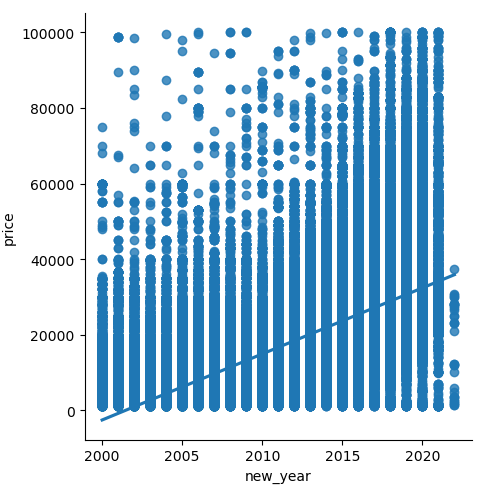
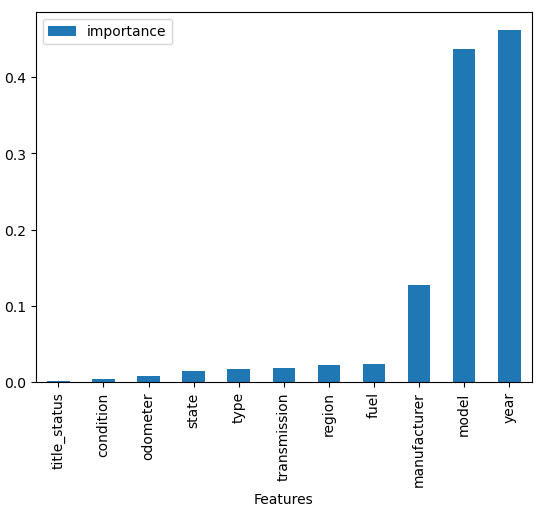


## Review Project

 1. Experience Documentation

- Lot of effort was spent on understanding the data as the data wasn't clean and traditional methods of cleaning were not working.
- Law of large numbers applied as it would take signifant effort to fill in the columns with mean or with and related category.
- Rest of the data provided after circumventing the nulls was clean this definitely appreciated.
- Redundent data like VIN or the columns which was already coded in VIN should be avoided or program to decode the VIN to save time.
- Lessons learnt is the every phase of the project is critical and important. The understanding/preparation phases are as important as modeling phases.
- Model can be optimized by including remaining 3 attributes and fixing the missing data in dataset.
